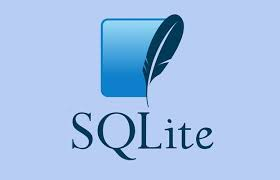

# Exploratory Data Analysis with SQL (2)

This notebook uses the 120 years of Olympics History dataset from Kaggle.

For the purpose of practice of SQL syntax the 1% of the dataset was sampled and loaded into a sqlite database file. Hence, the database table, **`athletes`**, has just 2169 rows unlike the original dataset.

#### List of questions

- Fetch the top 5 athletes who have won the most gold medals.
- Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.
- List down total gold medals won by each country.
- Identify which country won the most bronze medals.
- In which Sport/event, has United States won highest medals?
- Break down all olympic games where india won medal for Hockey and how many medals in each olympic games.

# Connect to SQLite DB

In [1]:
# !pip install sqlalchemy
# !pip install ipython-sql

In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

In [4]:
con = sqlite3.connect("athletes.db")
cur = con.cursor()

In [5]:
%sql sqlite:///athletes.db

#### 1. Fetch the top 5 athletes who have won the most gold medals.

In [6]:
%%sql 
SELECT *
FROM athletes
LIMIT 5

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
11592,Aranka Binder,F,26.0,163.0,47.0,Individual Olympic Athletes,IOA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Air Rifle, 10 metres",Bronze
26774,Frederik Albert De Waele,M,33.0,None,None,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Parallel Bars,None
132574,Yang Yun,F,15.0,158.0,40.0,China,CHN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,None
73415,Jan Magiera,M,26.0,178.0,78.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Cycling,"Cycling Men's Road Race, Individual",None
64978,Ludwig Kng,M,26.0,172.0,68.0,Switzerland,SUI,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Lightweight, Freestyle",None


In [7]:
%%sql
SELECT Name, Count(Medal) as Gold_Medals
FROM athletes
WHERE Medal = 'Gold' GROUP BY Name ORDER BY Medal DESC LIMIT 5

 * sqlite:///athletes.db
Done.


Name,Gold_Medals
smet Atl,1
Zhang Guozheng,1
Yoshikatsu Yoshida,1
Yelena Aleksandrovna Grudneva,1
Wladimir Reznitschenko,1


#### 2. Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

In [8]:
%%sql
SELECT Team, Count(Medal) as Medals
FROM athletes
GROUP BY Team ORDER BY Medals DESC LIMIT 5

 * sqlite:///athletes.db
Done.


Team,Medals
United States,31
Germany,19
France,18
Soviet Union,17
Italy,15


#### 3. List down total gold medals won by each country.

In [9]:
%%sql
SELECT Team, Count(Medal) as Medals
FROM athletes
WHERE Medal = 'Gold' GROUP BY Team ORDER BY Medals DESC

 * sqlite:///athletes.db
Done.


Team,Medals
United States,7
Soviet Union,6
Sweden,5
Russia,5
Italy,5
France,5
South Korea,4
Norway,4
Great Britain,4
Germany,4


#### 4. Identify which country won the most bronze medals.

In [10]:
%%sql
SELECT Team, Count(Medal) as Medals
FROM athletes
WHERE Medal = 'Bronze' GROUP BY Team ORDER BY Medals DESC LIMIT 1

 * sqlite:///athletes.db
Done.


Team,Medals
Germany,10


#### 5. In which Sport/event, has United States won the highest medals?

In [11]:
%%sql
SELECT Team, Sport, Count(Medal) as Medals
FROM athletes
WHERE Team = 'United States' GROUP BY Team

 * sqlite:///athletes.db
Done.


Team,Sport,Medals
United States,Art Competitions,31


#### 6. Break down all olympic games where india won medal for Hockey and how many medals in each olympic games.

In [12]:
%%sql
SELECT Games, Sport, Count(Medal) as Medals
FROM athletes
WHERE (Team = 'India' AND Sport = 'Hockey') GROUP BY Games

 * sqlite:///athletes.db
Done.


Games,Sport,Medals
1956 Summer,Hockey,1


<div class="alert alert-block alert-danger">
    <h1>CLOSE DB CONNECTION!!!</h1>
</div>

In [13]:
con.close()